In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

In [2]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [0]
    for i in range(niter):
        
        indices = np.random.choice(8,2)
        p = value(current, **kwargs)
        proposed = proposal(current, indices, **kwargs)       
        p /= value(proposed, **kwargs)
        if np.random.rand() > p:
            current = proposed
        else:
            current[indices[0]][indices[1]]=0
        post.append(current.sum())
    plot_grid(current.astype('bool'))
    return post[nburn:]

def value(current, **kwargs):
    _ = kwargs
    return current.sum()


def proposal(current, indices, **kwargs):
    _ = kwargs
    i=np.random.choice(8,2)#indices
    if current[i[0]][i[1]] == 1:
        return current
    s=0
    if i[0]!=0:
        s+=current[i[0]-1][i[1]]
    if i[0]!=7:
        s+=current[i[0]+1][i[1]]
    if i[1]!=0:
        s+=current[i[0]][i[1]-1]
    if i[1]!=7:
        s+=current[i[0]][i[1]+1]
    
    if s==0:
        current[i[0]][i[1]] = 1
    return current



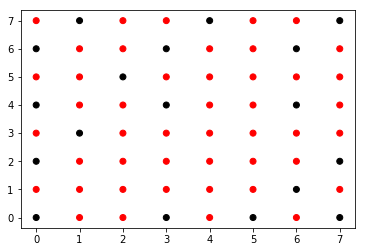

In [3]:
post = metroplis(np.zeros((8,8)), value, proposal, 100000)

In [4]:
print('В среднем количество закрашенных вершин составляет:',sum(post)/len(post))

В среднем количество закрашенных вершин составляет: 15.292897071029289


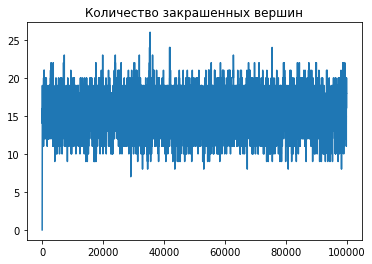

Ttest_indResult(statistic=6.554512385251571, pvalue=7.560784382407712e-11)

In [6]:
def g_test(x, start=0.1, end=0.1):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)

#plt.figure(figsize=(15,8))

plt.plot(post)
plt.title("Количество закрашенных вершин")
plt.show()
g_test(post[2010:10000])




Из этих данных сделаем вывод о стационарности

Построим распределение

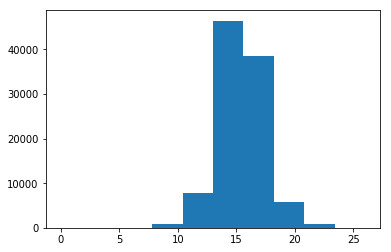

In [7]:

plt.hist(post)
plt.show()